# Project 4: Ordinary Differential Equation Solving
This project introduces a numerical method to solve a physical ODE.

## Objective:
A mass is attached to a spring and is allowed to oscillate. There is a drag on the system such that the mass ceases its oscillation after a while. We can model this as a second order, linear ODE

$$m\frac{d^{2}x}{dt^{2}}=-kx-c\frac{dx}{dt}$$

1. Solve the system using a self-built fourth-order Rugge-Kutta method
    1. Let $m=4, c=2, k=16$, initial condition $x(0)=2$ and boundary condition $\frac{dx}{dt}|_{t=0}=30$ in the range $0<t<20$.

2. Give the final $\Delta t$ used and list the calculated $x$ at $t=1,2,3, ..., 20$ for six decimal places.

3. Determine the solution to the problem using a solver from <code>scipy.integrate</code>.

4. Now use the <code>sympy</code> package to determine the answer.

5. Compare the three methods by plotting the answer.

## Solutions:

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.plotting import plot

In [39]:
m, k, c = sym.symbols('m k c', real = True)
t = sym.Symbol('t', real=True)
x = sym.Function('x')(t)

In [40]:
LHS, RHS = m*sym.diff(sym.diff(x, t), t), -k*x-c*sym.diff(x, t)
system = sym.Eq(LHS, RHS)
system

Eq(m*Derivative(x(t), (t, 2)), -c*Derivative(x(t), t) - k*x(t))

In [58]:
initial = {x.subs(t,0):2,
           sym.diff(x,t).subs(t,0):30}
solution = sym.dsolve(system, ics=initial).rhs
solution = sym.diff(solution, t)

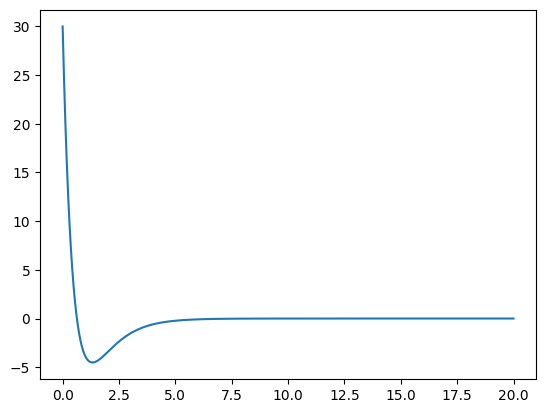

In [59]:
t_array = np.linspace(0,20,1000)
solution_numpy = sym.lambdify((t, m, k, c), solution)
y = solution_numpy(t_array,1,2,3)

plt.plot(t_array, y)